In [254]:
import numpy as np 
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader,random_split,Dataset
import torchvision.transforms as transforms
import torchvision.models as models
from d2l import torch as d2l
import matplotlib.pyplot as plt

In [255]:
# train = pd.read_csv('C:/Users/MJ/Desktop/FunctionApproximation/train.csv')
# test =pd.read_csv('C:/Users/MJ/Desktop/FunctionApproximation/test.csv')
# val_size = int(0.2 * len(train))
# train_size=len(train)-val_size
# train, valid = random_split(train,[train_size, val_size])

In [256]:
cuda = True if torch.cuda.is_available() else False

In [257]:
train=pd.read_csv("C:/Users/MJ/Desktop/FunctionApproximation/train.csv")
test=pd.read_csv("C:/Users/MJ/Desktop/FunctionApproximation/test.csv")
test_x=torch.tensor(test.drop(['id'],axis=1).values,dtype=torch.float32)


In [258]:
class FADataset(Dataset):
    def __init__(self, data):
        super().__init__()
        self.x=torch.tensor(data.drop(['id','y'],axis=1).values,dtype=torch.float32)
        self.y=torch.tensor(data['y'].values,dtype=torch.float32)
       
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        data=self.x[idx]
        target=self.y[idx]
        return data,target,idx

    # def update_loss_value(self, idx):
    #     self.flag[idx] = True
        

In [259]:
batch_size=80
dataset=FADataset(train)
trainset, validset = random_split(dataset, [0.9, 0.1])
train_dl= DataLoader(trainset, shuffle=True, batch_size=batch_size)
valid_dl= DataLoader(validset, shuffle=True, batch_size=batch_size)
test_dl=DataLoader(test_x,shuffle=False, batch_size=batch_size)

In [260]:
class MLP(nn.Module):
    def __init__(self, input_dim, num_hidden1, num_hidden2,num_hidden3,num_hidden4,num_hidden5,num_hidden6, output_dim):
        super().__init__()
        self.model=nn.Sequential(nn.Linear(input_dim,num_hidden1),
                                nn.ReLU(True),
                                nn.Linear(num_hidden1,num_hidden2),
                                nn.ReLU(True),
                                nn.Linear(num_hidden2,num_hidden3),
                                nn.ReLU(True),
                                nn.Linear(num_hidden3,num_hidden4),
                                nn.ReLU(True),  
                                nn.Linear(num_hidden4,num_hidden5),
                                nn.ReLU(True),  
                                nn.Linear(num_hidden5,num_hidden6),
                                nn.Linear(num_hidden6,output_dim)
                                )
    def forward(self, x):
        return self.model(x)


In [261]:
model= MLP(input_dim=2, num_hidden1=80,num_hidden2=128,num_hidden3=256,num_hidden4=512,num_hidden5=256,num_hidden6=128, output_dim=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [262]:
num_epochs = 30
losses=[]
outlier_x= []
outlier_y= []
size = len(train_dl)
model.train()
for epoch in range(num_epochs):
    for batch,(data, target,idx) in enumerate(train_dl):
        outputs = model(data)
        loss = criterion(outputs.reshape(-1), target.reshape(-1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 80 == 0: #每通過batch個數量的資料就輸出一次損失的值
            print(f"loss: {loss.item():>7f} ")
            losses.append(loss.item())


loss: 1.154741 
loss: 0.098158 
loss: 0.106509 
loss: 0.072980 
loss: 0.066029 
loss: 0.046428 
loss: 0.055792 
loss: 0.047369 
loss: 0.052090 
loss: 0.045088 
loss: 0.031578 
loss: 0.025769 
loss: 0.032230 
loss: 0.037237 
loss: 0.024952 
loss: 0.024333 
loss: 0.028058 
loss: 0.022809 
loss: 0.021743 
loss: 0.028471 
loss: 0.030224 
loss: 0.034693 
loss: 0.028154 
loss: 0.026366 
loss: 0.032720 
loss: 0.018684 
loss: 0.025061 
loss: 0.029130 
loss: 0.024157 
loss: 0.023476 
loss: 0.024626 
loss: 0.031150 
loss: 0.029343 
loss: 0.026774 
loss: 0.026828 
loss: 0.023240 
loss: 0.019552 
loss: 0.019151 
loss: 0.027239 
loss: 0.024238 
loss: 0.019853 
loss: 0.026127 
loss: 0.023245 
loss: 0.021801 
loss: 0.019886 
loss: 0.026752 
loss: 0.026887 
loss: 0.030240 
loss: 0.026485 
loss: 0.029402 
loss: 0.018305 
loss: 0.020318 
loss: 0.027618 
loss: 0.027465 
loss: 0.026371 
loss: 0.018182 
loss: 0.027215 
loss: 0.024838 
loss: 0.020570 
loss: 0.019970 


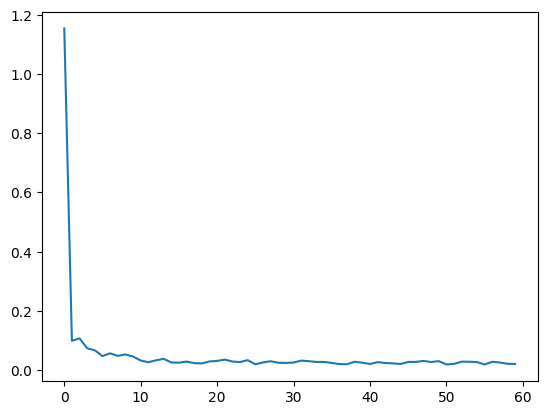

In [263]:
plt.plot(losses)

In [264]:
model.eval()
for batch,(data, target,idx) in enumerate(valid_dl):
    outputs = model(data)
    loss = criterion(outputs.reshape(-1), target.reshape(-1))
print(f"loss: {loss.item():>7f} ")

loss: 0.019887 


In [265]:
model.eval()
output=[]
for i in range(len(test_x)):
    output.append((model(test_x[i])).item())

In [266]:
min(output)

0.4194880723953247

In [267]:
sample_submission=pd.read_csv("C:/Users/MJ/Desktop/FunctionApproximation/sample_submission.csv")
sample_submission['y']=output
sample_submission.to_csv("C:/Users/MJ/Desktop/sample_submission.csv",index=False)